# Preprocessing

In [5]:
import os
import time
import torch
import sklearn
import pickle
import pydot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.autograd import Variable

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [6]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [7]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
34055,42,blue-collar,married,basic.4y,unknown,no,no,telephone,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
8768,34,admin.,married,university.degree,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
28156,55,housemaid,married,basic.4y,no,yes,no,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.466,5099.1,yes
9804,39,technician,divorced,professional.course,no,no,no,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
32523,29,admin.,single,high.school,no,no,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
31450,54,technician,divorced,university.degree,no,yes,no,cellular,may,wed,...,2,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no
16134,30,admin.,single,university.degree,no,no,yes,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
2808,34,technician,divorced,professional.course,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
32761,38,blue-collar,married,high.school,unknown,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
5591,49,admin.,married,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.shape

(41188, 21)

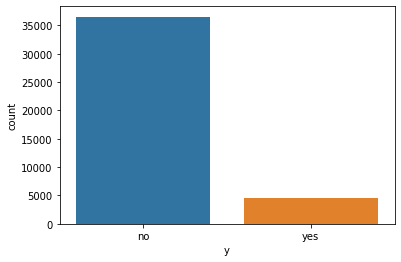

In [9]:
sns.countplot(x='y', data=df)
plt.show();

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Version 1

In [11]:
df2 = pd.get_dummies(df, columns=['job','marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
print(df2.shape)

(41188, 64)


In [12]:
df2['y'] = df2['y'].astype('category')

In [13]:
print(df2.dtypes)

age                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
                        ...  
day_of_week_tue         uint8
day_of_week_wed         uint8
poutcome_failure        uint8
poutcome_nonexistent    uint8
poutcome_success        uint8
Length: 64, dtype: object


In [14]:
df2.isnull().sum()

age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 64, dtype: int64

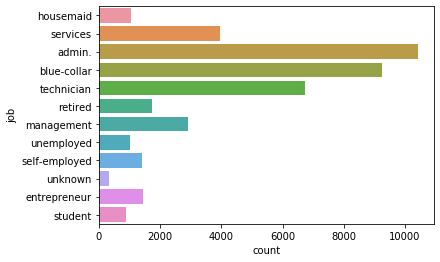

In [15]:
sns.countplot(y='job', data=df);

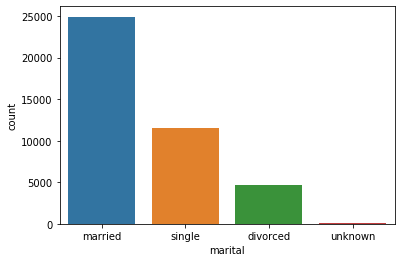

In [16]:
sns.countplot(x='marital', data=df);

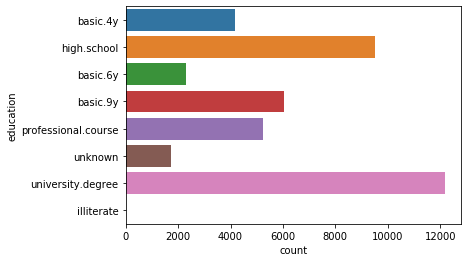

In [17]:
sns.countplot(y='education', data=df);

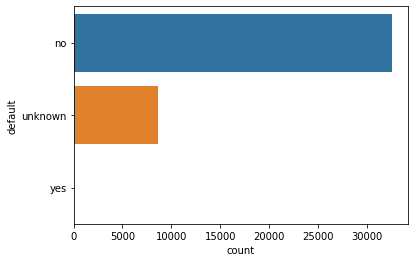

In [18]:
sns.countplot(y='default', data=df);

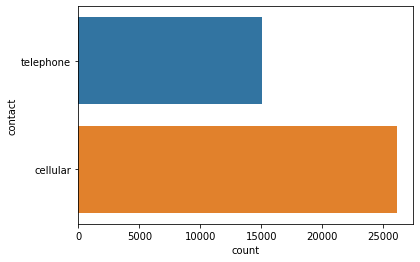

In [19]:
sns.countplot(y='contact', data=df);

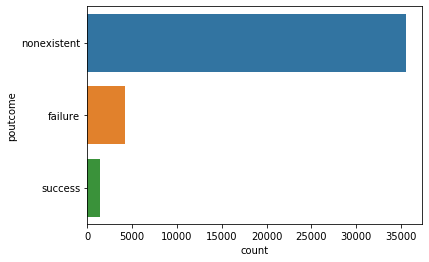

In [20]:
sns.countplot(y='poutcome', data=df);

## Version 2

In [21]:
df3 = df.copy()

In [22]:
df3.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [23]:
le = preprocessing.LabelEncoder()

In [24]:
df3.job = le.fit_transform(df3.job)
df3.marital = le.fit_transform(df3.marital)
df3.education = le.fit_transform(df3.education)
df3.default = le.fit_transform(df3.default)
df3.housing = le.fit_transform(df3.housing)
df3.loan = le.fit_transform(df3.loan)
df3.contact = le.fit_transform(df3.contact)
df3.month = le.fit_transform(df3.month)
df3.day_of_week = le.fit_transform(df3.day_of_week)
df3.poutcome = le.fit_transform(df3.poutcome)

In [25]:
df3['y'] = df3.y.map(dict(yes=1, no=0))

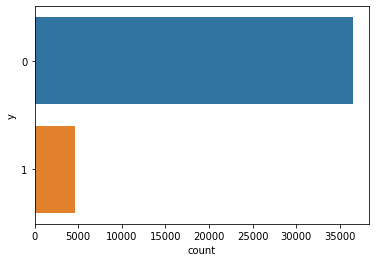

In [26]:
sns.countplot(y='y', data=df3);

In [27]:
df3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [28]:
X = df3.iloc[:,0:19]
y = df3.iloc[:,20]

# SKLEARN

In [29]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [30]:
x_train.shape, y_train.shape

((32950, 19), (32950,))

In [31]:
x_test.shape, y_test.shape

((8238, 19), (8238,))

In [32]:
model = Sequential()
model.add(Dense(10, input_dim=19, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
None


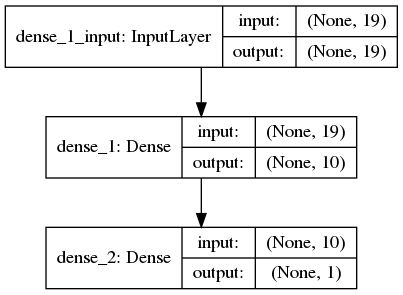

In [34]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [37]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [34]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
32950/32950 [==============================] - 1s 16us/step - loss: 0.3029 - accuracy: 0.8943
Epoch 2/10
32950/32950 [==============================] - 0s 11us/step - loss: 0.2717 - accuracy: 0.8996
Epoch 3/10
32950/32950 [==============================] - 0s 11us/step - loss: 0.2674 - accuracy: 0.9011
Epoch 4/10
32950/32950 [==============================] - 0s 12us/step - loss: 0.2675 - accuracy: 0.9012
Epoch 5/10
32950/32950 [==============================] - 0s 11us/step - loss: 0.2698 - accuracy: 0.9009
Epoch 6/10
32950/32950 [==============================] - 0s 11us/step - loss: 0.2670 - accuracy: 0.8990
Epoch 7/10
32950/32950 [==============================] - 0s 11us/step - loss: 0.2655 - accuracy: 0.9012
Epoch 8/10
32950/32950 [==============================] - 0s 14us/step - loss: 0.2673 - accuracy: 0.9006
Epoch 9/10
32950/32950 [==============================] - 0s 14us/step - loss: 0.2674 - accuracy: 0.9011
Epoch 10/10
32950/32950 [==============================

In [35]:
scores = model.evaluate(np.array(x_test), np.array(y_test))
print("\n final accuracy: %.2f%%" % (scores[1]*100))

8238/8238 [==============================] - 0s 27us/step

 final accuracy: 90.05%


# Benchmarking

In [35]:
list_optimzers = ['adam', 'sgd', 'RMSprop', 'Adagrad', 'Adamax', 'Nadam']

In [38]:
for l in list_optimzers:
    model.compile(loss='binary_crossentropy', optimizer=l, metrics=['accuracy'])
    model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True, verbose=0)
    scores = model.evaluate(np.array(x_test), np.array(y_test))
    print("\n final accuracy for %s optimizer:  %.2f%%" % (l,scores[1]*100))

8238/8238 [==============================] - 0s 22us/step

 final accuracy for adam optimizer:  90.47%
8238/8238 [==============================] - 0s 18us/step

 final accuracy for sgd optimizer:  89.78%
8238/8238 [==============================] - 0s 21us/step

 final accuracy for RMSprop optimizer:  90.84%
8238/8238 [==============================] - 0s 19us/step

 final accuracy for Adagrad optimizer:  90.98%
8238/8238 [==============================] - 0s 19us/step

 final accuracy for Adamax optimizer:  90.99%
8238/8238 [==============================] - 0s 18us/step

 final accuracy for Nadam optimizer:  90.88%


In [39]:
from keras_radam import RAdam

model.compile(loss='binary_crossentropy', optimizer=RAdam(), metrics=['accuracy'])
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True, verbose=0)
scores = model.evaluate(np.array(x_test), np.array(y_test))
print("\n final accuracy for %s optimizer:  %.2f%%" % (l,scores[1]*100))

8238/8238 [==============================] - 0s 20us/step

 final accuracy for Nadam optimizer:  90.88%


# TORCH

In [33]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [43]:
x_train_torch = torch.tensor(x_train.values)
x_test_torch = torch.tensor(x_test.values)

y_train_torch = y_train.values
y_train_torch = y_train_torch.reshape(y_train_torch.shape[0], 1)
y_train_torch = torch.tensor(y_train_torch)

y_test_torch = y_test.values
y_test_torch = y_test_torch.reshape(y_test_torch.shape[0], 1)
y_test_torch = torch.tensor(y_test_torch)

In [44]:
x_train_t = torch.from_numpy(x_train.to_numpy()).float()
y_train_t = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

x_test_t = torch.from_numpy(x_test.to_numpy()).float()
y_test_t = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

In [45]:
print(x_train_t.shape, y_train_t.shape)
print(x_test_t.shape, y_test_t.shape)

torch.Size([32950, 19]) torch.Size([32950])
torch.Size([8238, 19]) torch.Size([8238])


In [46]:
y_train_torch.size()

torch.Size([32950, 1])

In [47]:
x_train_torch.size()

torch.Size([32950, 19])

In [34]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(19, 10)
        self.tanh1 = nn.Tanh()
        self.out = nn.Linear(10, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.tanh1(a1)
        a2 = self.out(h1)
        y = self.out_act(a2)
        y = a2
        return y

In [62]:
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001)
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Questions for group :
    
- why didnt we use the full version of the dataset ?
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html